# Rachel Ward - DAV 6150 - Assignment 1

## Introduction

For this assignment I will be constructing two cross validated linear regression models that predict the energy production of a power plant. To accomplish this I will be using data from the [UC Irvine machine learning archive.](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

To accomplish this, I will perform two phases of work. The first will include data preparation and exploratory data analysis ("EDA"). In the first phase I will perform basic data preparation such as checking for null values and seeing what data types the different columns are. Next, I will perform an exploratory data analysis to see the distributions of each variable, note any outliers, and if see if the variables are correlated using a correlation matrix. This will inform which variables are used in my linear regression models. 

In the second phase I will create two different linear regression models using the variables discovered in our EDA and sklearn. I will then cross-validate them using K-fold cross validation, train the models, and create residual plots. This will help me determine which model is the best predictor of energy production.

## Phase 1: Data preparation & Exploratory Data Analysis

### Data Preparation

For the first part of this phase, I will read in the data which I have stored in my GitHub account. Then I will rename columns, check for nulls, and get the data types for each column.

In [1]:
#first import the libraries I will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#now read in the file
filename = "https://raw.githubusercontent.com/rachelward617/DAV-6150/master/M2_Data.csv"
energy = pd.read_csv(filename)

#check results
energy.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


From the UCI website linked above, we know that the attributes column headers stand for the following:
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

I will rename my columns to make the data easier to understand.

In [2]:
#use pandas rename function to rename the columns
energy.rename(columns={'T':'temperature','V':'exhaust_vacuum', 'AP':'ambient_pressure', 'RH': 'relative_humidity', 'EP': 'energy_production'}, inplace=True)

#check results
energy.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_production
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# check the dataset for null values
energy.isnull().sum()

temperature          0
exhaust_vacuum       0
ambient_pressure     0
relative_humidity    0
energy_production    0
dtype: int64

In [4]:
#check how many records are in the data set
energy.shape

(9568, 5)

In [5]:
#check to see if all data types are what I expected using dtypes function
energy.dtypes

temperature          float64
exhaust_vacuum       float64
ambient_pressure     float64
relative_humidity    float64
energy_production    float64
dtype: object

### Exploratory Data Analysis

With data preparation complete, I now move on to the Exploratory Data Analysis. First I will get summary statistics for each varible. Then I will generate boxplots for each variable (since all variables are numeric, this is appropriate) to check for outliers. Next, I will generate a pair plot to check the distributions for skew as well as get an idea of any variables that may be good predictors for energy production. Lastly, I will create a correlation matrix heat map to show the correlation between each of the variables. This process will allow me to choose appropriate data to include in my models for Phase 2.

### Exploratory Data Analysis - Summary Statistics

Now that we know there are no missing values, and that all variables are the type we expected, we can proceed with our Exploratory Data Analysis, in which we examine the distributions of each of the variables as well as any correlations among them. We begin by getting summary statistics for each variable.

In [6]:
#get summary statistics
energy.describe()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### Exploratory Data Analysis - Boxplots

Next I will generate boxplots for each of the columns to determine if there are any outliers. Since all variables in this dataset are numeric, a boxplot is an appropriate choice. 

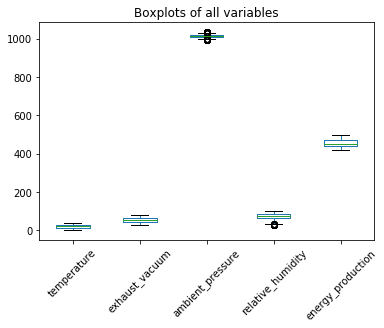

In [7]:
#generate boxplots for each variable; scale is not important as I am using this to determine outliers
#I will generate a pair plot below to look for distribution
energy.boxplot(grid= False, rot = 45)
#give the plot a title
plt.title('Boxplots of all variables')
#show results
plt.show()

### Exploratory Data Analysis - Summary Statistics & Boxplots : Results

From our summary statistics, we confirm that there are no nulls and see important information regarding the center and spread of each of our variables. This information will be valuable later to see if our model generates values that are within reason.

Our boxplots show that both ambient pressure and relative humidity have outliers present. Ambient pressure has outliers both above and below the distribution, while relative humidity only has outliers below the distribution. 

### Exploratory Data Analysis - Pair Plot

Next I will plot each variable against every other variable to see if there appear to be any strong relationships between variables, or conversely to see if there are any patterns in the data that would indicate we should not use that particular variable. By using a seaborn pair plot, I will also be able to see the distributions for each variable in the form of a histogram.

<Figure size 432x288 with 0 Axes>

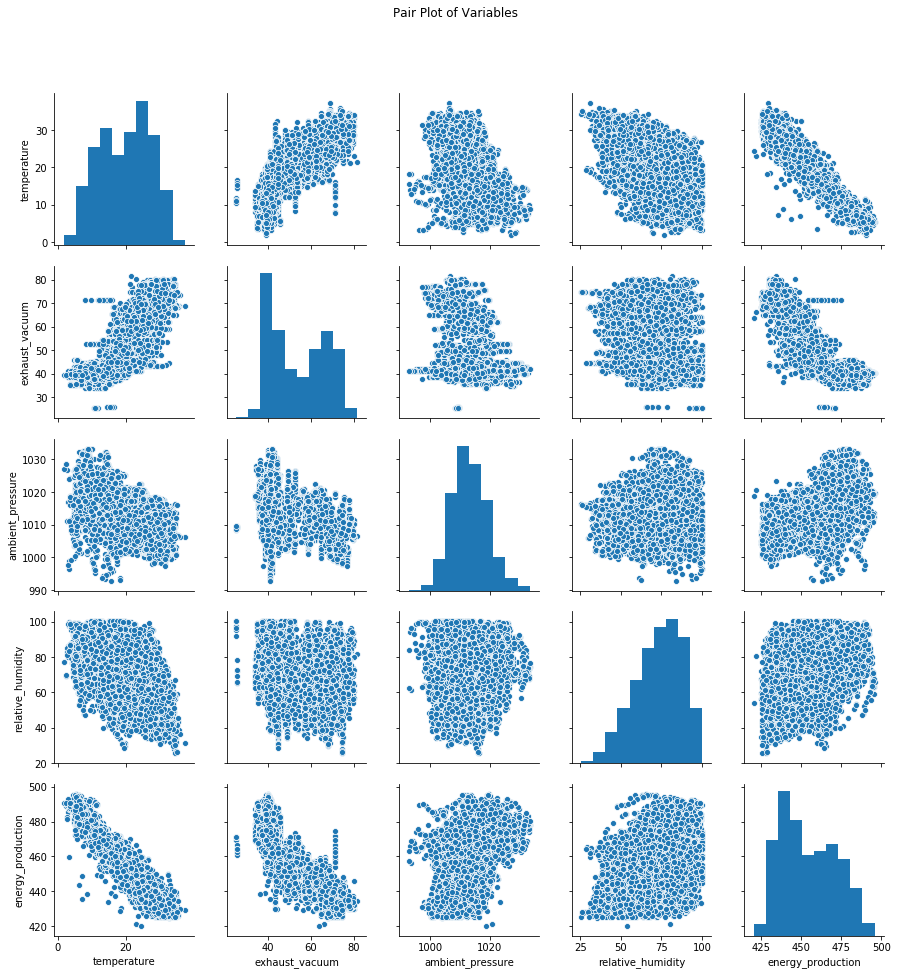

In [8]:
# Create a pairplot to spot any abnormalities we should be aware of in the scatterplot.
#to get the title to appear correctly I referenced: https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid
fig2 = plt.figure() #define the figure
g = sns.pairplot(energy) #define what plot to use and what data to look at
g.fig.suptitle("Pair Plot of Variables", y=1.08) # set the title with y= some height>1 so it appears on top
plt.show() #display results

### Exploratory Data Analysis - Pair Plot: Results

From the plots above, temperature and exhaust vacuum appear to have the strongest relationship with energy production. Relative humidity does not appear to have a strong relationship with any of the variables, indicating it may not be a great predictor. Ambient pressure appears to have a weak positive relationship with energy production, which may prove of interest since both temperature and exhaust vacuum have negative relationships with energy production.

The distributions of temperature and exhaust vacuum are both bimodal, as is the distribution of energy production. This is further indication that these temperature and exhaust vacuum may be good predictors of energy production. Ambient pressure appears to be normally distributed. The distribution of relative humidity is skewed left, which indicates it may not be a good predictor. 

In our boxplots above, we saw that ambient pressure had outliers on both sides of the distribution. Since the data for this data is normally distributed, these outliers are not as concerning. Relative humidity also showed low outliers, which is more troubling now that we see that the distribution of relative humidity is left skewed. The presence of outliers combined with the shape of the distribution indicate relative humidity may not be a suitable predictor.

### Exploratory Data Analysis - Correlation Matrix

For the last part of my exploratory data analysis I will look at a correlation matrix in the form of a heat map to confirm or dispell my findings from the pair plot above. 

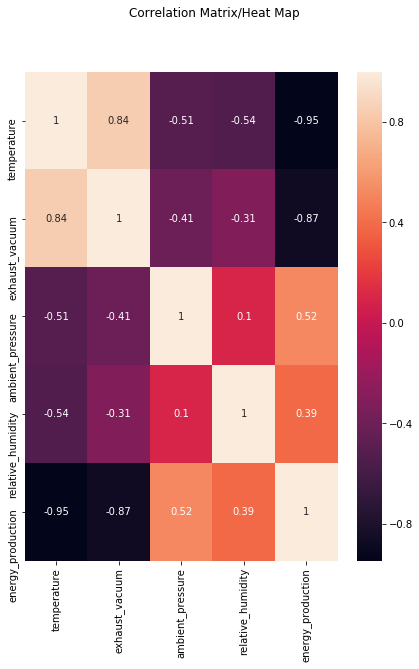

In [9]:
#next get correlation matrix and plot it using seaborn
#note that there are issues with this plot that I resolved by following the code provided in the comments section here:
#https://github.com/mwaskom/seaborn/issues/1773
fig = plt.figure(figsize=(7, 9)) #set figure and figure size
corrMatrix = energy.corr() #get correlation matrix

sns.heatmap(corrMatrix, annot=True) #graph correlation matrix

# fix for mpl bug that cuts off top/bottom of seaborn viz taken from link above
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

### Exploratory Data Analysis - Correlation Matrix: Results

Based on the correlation matrix shown above, energy production and temperature have a very strong negative correlation (-0.95). This indicates that temperature may be a good explanatory variable for our model. Exhaust vacuum also has a strong negative correlation with energy production (-0.87). As suspected from the pair plots above, relative humidity has a moderate or weak relationship with each of the other variables. Ambient pressure also has a moderate to weak correlation with each of the other variables. Ambient pressure also has a higher correlation with energy production (.52) than relative humidity does (.39).

## Phase 1: Results

Through my EDA and data preparation, I learned that the best predictors for energy production are likely to be temperature and exhaust vacuum. I will also include ambient pressure in my model as that has a different relationship with energy production and this difference might prove meaningful in coordination with the other variables. Due to the outliers present and the shape of the relative humidity distribution, I will not be using relative humidity as a predictor variable in my analysis. 

## Phase 2: Regression Models & Cross Validation

In this phase I will create two linear regression models using sklearn and cross validate the results using k-fold cross validation. 

In my phase 1 results I discuss using temperature, exhaust vacuum, and ambient pressure as predictors for my models. From the UCI website, we know that:

>"A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance."

I will therefore use exhaust vacuum in both models, since it is the only variable that works with the steam turbine. I will use the other two variables in combination with this as described in the sections below.

For each model I will split the data into training and testing sets, create a linear regression model using sklearn, cross validate the model using k-fold cross validation, and view the statistics of the model.

### First Model

In this model I will use the variables exhaust vacuum, temperature, and ambient pressure as explanatory variables. I will first split the data into training and testing sets, setting aside 30% of the data for testing and using the remaining 70% of the data for training. Then I will create a linear regression model using sklearn and use k-fold cross validation with 5 folds to check the accuracy of my model. I will also train the algorithm and plot the residuals to see if the residuals meet the normalcy requirements.

In [10]:
#store the response variable in it's own variable
y = energy['energy_production']

#check results
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: energy_production, dtype: float64

In [11]:
# create a copy of the data frame columns I want and store them in X1
X1 = energy[['exhaust_vacuum','temperature', 'ambient_pressure']].copy()

#check results
X1.head()

,exhaust_vacuum,temperature,ambient_pressure
0,41.76,14.96,1024.07
1,62.96,25.18,1020.04
2,39.40,5.11,1012.16
3,57.32,20.86,1010.24
4,37.50,10.82,1009.23


In [12]:
# Now split the data into training and testing subsets. 
#first import the necessary function
from sklearn.model_selection import train_test_split

#split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=12)

In [13]:
#check to make sure we divided the data correctly
print("30% of the number of variables in energy_production is:", len(energy['energy_production'])*.3)
print("The number of variables in X1_test is:", len(X1_test))

30% of the number of variables in energy_production is: 2870.4
The number of variables in X1_test is: 2871


Now that the data has been split into testing and training sets properly, I will use sklearn linear regression and cross_val_score functions to create the first linear regression model and use k-fold cross validation with 5 folds to test the accuracy of my model.

In [14]:
#next load the functions I need from the sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#Assign the linear regression model to a variable
model = LinearRegression()

#use k-fold cross validation with 5 folds
results = cross_val_score(model, X1_train, y1_train, cv=5)

#print results
print (results)
#calculate the average accuracy across all 5 folds and print the results
print("The average accuracy score for the 5 folds was: ", np.mean(results))

[0.91333502 0.91759835 0.91867513 0.92004528 0.91658955]
The average accuracy score for the 5 folds was:  0.917248664614732


Now I will fit the first model so that I can generate the equation of the line and plot the residuals.

In [15]:
#train the algorithm for the first model
model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#print coefficients
print("The coefficients are: ",model.coef_)
print("The intercept is:", model.intercept_)

The coefficients are:  [-0.32972639 -1.62950431  0.16489318]
The intercept is: 337.16959521329056


**The equation for the first model is: predicted_energy_production = -0.330(exhaust_vacuum) - 1.630(temperature) + 0.165(ambient_pressure) + 337.170**

Now I will see how the residual plot and distribution of residuals look since model accuracy is not the only important metric.

In [17]:
# generate predictions for the test data using our first model
y_predict1 = model.predict(X1_test)
#show results
y_predict1[:10]

array([440.72180669, 486.68309606, 432.97265381, 467.31201163,
       453.59336966, 455.65893546, 456.34387106, 463.11243483,
       446.20000758, 424.25119307])

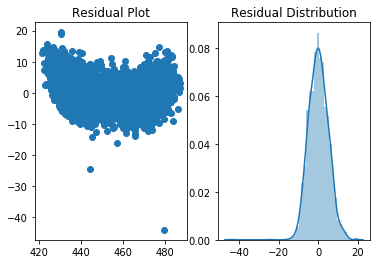

In [18]:
#calculate the residuals
residuals = np.array(y1_test) - y_predict1

#plot the residual plot for the first model
fig = plt.figure()#define the figure
plt.subplot(1,2,1) #create the first subplot
residual=plt.scatter(y_predict1,residuals); #scatterplot of the residuals for the first model
plt.title('Residual Plot')

#create the residual distribution
plt.subplot(1,2,2)
sns.distplot(residuals);
plt.title('Residual Distribution');

### First Model: Results

My first model, based on temperature, exhaust_vacuum, and ambient pressure, has a cross validated accuracy of 91.7%. While this is a great result, I will still create another model to see if I can create a model of even higher accuracy.

Additionally, the distribution of the residuals is normal, which is important. The residual plot, however, appears to have a pattern. This may mean that a linear regression model is not the best type of model for this data.

### Second Model

For this model I will use the explanatory variables exhaust_vacuum and temperature only.  As stated above, I think the model needs to include exhaust_vacuum as that is the only variable that has an effect on steam turbine. Since temperature had a higher correlation, as well as a bimodal distribution, I chose to use temperature as the other variable. 

As before, I will first split the data into training and testing sets, setting aside 30% of the data for testing and using the remaining 70% of the data for training. Then I will create a linear regression model using sklearn and use k-fold cross validation with 5 folds to check the accuracy of my model. Then I will train the model, calculate the residuals, and plot the residuals to check for normalcy.

In [19]:
#create another new dataframe with only exhaust_vacuum and temperature
X2= energy[['exhaust_vacuum','temperature']].copy()

#check results
X2.head()

,exhaust_vacuum,temperature
0,41.76,14.96
1,62.96,25.18
2,39.40,5.11
3,57.32,20.86
4,37.50,10.82


In [20]:
#split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=12)

In [21]:
#check to make sure we divided the data correctly
print("30% of the number of variables in energy_production is:", len(energy['energy_production'])*.3)
print("The number of variables in X2_test is:", len(X2_test))

30% of the number of variables in energy_production is: 2870.4
The number of variables in X2_test is: 2871


In [22]:
#Assign the linear regression model to a variable
model2 = LinearRegression()

#use k-fold cross validation with 5 folds
results2 = cross_val_score(model2, X2_train, y2_train, cv=5)

#print results
print (results2)
#calculate the average accuracy across all 5 folds and print the results
print("The average accuracy score for the 5 folds was: ", np.mean(results2))

[0.91014846 0.91535804 0.91601249 0.91769219 0.91494075]
The average accuracy score for the 5 folds was:  0.9148303865957537


Now I will train the algorithm, calculate the line of regression and plot the residuals.

In [23]:
#train the algorithm for the second model
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#print coefficients
print("The coefficients are: ",model2.coef_)
print("The intercept is:", model2.intercept_)

The coefficients are:  [-0.32643356 -1.70087138]
The intercept is: 505.4819358888446


**Our second linear regression line is: predicted_energy_production = -0.326(exhaust_vacuum) - 1.701(temperature) + 505.482**

In [25]:
# generate predictions for the test data using our second model
y_predict2 = model2.predict(X2_test)
#show results
y_predict2[:10]

array([440.33590315, 487.16788701, 432.65825176, 465.55150922,
       453.40879589, 455.75050211, 455.99718463, 463.14808574,
       447.04783107, 423.85442654])

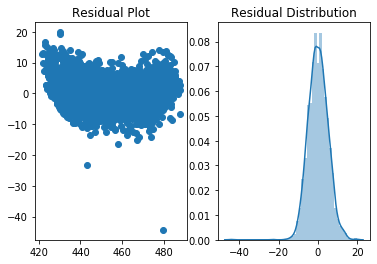

In [26]:
#calculate the residuals
residuals2 = np.array(y2_test) - y_predict2

#plot the residual plot for the first model
fig = plt.figure()#define the figure
plt.subplot(1,2,1) #create the first subplot
resid2=plt.scatter(y_predict2,residuals2); #scatterplot of the residuals for the first model
plt.title('Residual Plot')

#create the residual plot for the second model
plt.subplot(1,2,2)
sns.distplot(residuals2);
plt.title('Residual Distribution');

### Second Model: Results

My second model, based on exhaust_vacuum and temperature, has a cross-validated accuracy of 91.5%. This is only slight worse than the model that also included ambient pressure. This slight difference indicates that ambient pressure was not a signicant indicator. 

The residual distribution appears to be nearly normal. However, the residual plot again shows a pattern, which indicates that a linear model may not be the best choice for this data.

## Results & Conclusions

Both of the models I created had an a cross validated accuracy of over 90%. Given the extra computing power needed to include three variables instead of two, if I were thinking long term, I would choose the second model as the marginal difference between two does not justify the extra computing power needed, in my opinion.

However, I would be remiss to not mention that the pattern shown in the residual plot could mean that a linear regression model is not the best type of model for this data.

Additionally, in the future, it could prove interesting to standardize the variables since there are so many different scales being used in this data. Perhaps standardizing the data would help create a more accurate model.